# 1. Imports

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import random

# 2. Recolectar Datos y divicion de Datos

## Obtener

In [88]:
data = np.load('proyecto_data/proyecto_training_data.npy')
data.shape

(1460, 6)

In [89]:
df = pd.DataFrame(data, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


## Validar

In [90]:
for col in df:
    porcentaje = df[col].isnull().mean()
    if (porcentaje > 0):
        print(f'{col}: {porcentaje}')

LotFrontage: 0.1773972602739726


In [91]:
df['LotFrontage'].fillna(0, inplace = True)

## Dividir

In [92]:
size = np.shape(data)[0]
secctions = np.split(data, 10) # Dividimos en 10 secciones iguales
training_data = [] 
for i in range(8):
    training_data.append(secctions.pop(random.randint(0,9-i))) # Agarramos 8 de las secciones de manera aleaotria para hacer el 80% de entremaiento
validating_data = secctions # El resto se vuelve el 20% de validacion

In [93]:
# Los transformamos en Numpy Array
training_data = np.array(training_data)
validating_data = np.array(validating_data)

In [94]:
# Unimos las secciones para que tengan la misma forma que el original
training_data = np.reshape(training_data, [np.shape(training_data)[0] * np.shape(training_data)[1], np.shape(training_data)[2]])
validating_data = np.reshape(validating_data, [np.shape(validating_data)[0] * np.shape(validating_data)[1], np.shape(validating_data)[2]])

In [95]:
training_data.shape

(1168, 6)

In [96]:
df_training = pd.DataFrame(training_data, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df_training.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [97]:
validating_data.shape

(292, 6)

In [98]:
df_validating = pd.DataFrame(validating_data, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df_validating.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,133000.0,4.0,989.0,6.0,1935.0,51.0
1,369900.0,8.0,2028.0,7.0,2005.0,88.0
2,130000.0,6.0,838.0,5.0,1918.0,55.0
3,137000.0,5.0,860.0,4.0,1982.0,74.0
4,143000.0,5.0,1473.0,5.0,1968.0,65.0


# 3. Anáslisis Exploratorio

## Funciones

In [99]:
def Analisis_Exploratorio(df):
    for col in df:
        df_describe = df[col].describe()
        print("---->\t" + col)

        print("Media:\t\t", df_describe['mean'])
        print("Minimo:\t\t", df_describe['min'])
        print("Maximo:\t\t", df_describe['max'])
        print("Rango:\t\t", (df_describe['max'] - df_describe['min']))
        print("Desviacion:\t", df_describe['std'])


        print("---------------------------------")
        print("---------------------------------")

## Sobre Data

In [100]:
Analisis_Exploratorio(df)

---->	SalePrice
Media:		 180921.19589041095
Minimo:		 34900.0
Maximo:		 755000.0
Rango:		 720100.0
Desviacion:	 79442.50288288663
---------------------------------
---------------------------------
---->	OverallQual
Media:		 6.0993150684931505
Minimo:		 1.0
Maximo:		 10.0
Rango:		 9.0
Desviacion:	 1.3829965467415923
---------------------------------
---------------------------------
---->	1stFlrSF
Media:		 1162.626712328767
Minimo:		 334.0
Maximo:		 4692.0
Rango:		 4358.0
Desviacion:	 386.5877380410738
---------------------------------
---------------------------------
---->	TotRmsAbvGrd
Media:		 6.517808219178082
Minimo:		 2.0
Maximo:		 14.0
Rango:		 12.0
Desviacion:	 1.625393290584064
---------------------------------
---------------------------------
---->	YearBuilt
Media:		 1971.267808219178
Minimo:		 1872.0
Maximo:		 2010.0
Rango:		 138.0
Desviacion:	 30.202904042525265
---------------------------------
---------------------------------
---->	LotFrontage
Media:		 57.62328767123287

## Sobre Training

In [101]:
Analisis_Exploratorio(df_training)

---->	SalePrice
Media:		 179270.6095890411
Minimo:		 34900.0
Maximo:		 611657.0
Rango:		 576757.0
Desviacion:	 75542.56275411988
---------------------------------
---------------------------------
---->	OverallQual
Media:		 6.084760273972603
Minimo:		 1.0
Maximo:		 10.0
Rango:		 9.0
Desviacion:	 1.370083320753504
---------------------------------
---------------------------------
---->	1stFlrSF
Media:		 1155.2328767123288
Minimo:		 334.0
Maximo:		 3228.0
Rango:		 2894.0
Desviacion:	 373.0984862289525
---------------------------------
---------------------------------
---->	TotRmsAbvGrd
Media:		 6.5145547945205475
Minimo:		 2.0
Maximo:		 12.0
Rango:		 10.0
Desviacion:	 1.6091407087243896
---------------------------------
---------------------------------
---->	YearBuilt
Media:		 1971.2174657534247
Minimo:		 1872.0
Maximo:		 2010.0
Rango:		 138.0
Desviacion:	 30.193531198253492
---------------------------------
---------------------------------
---->	LotFrontage
Media:		 57.5556506849315

## Sobre Validating

In [102]:
Analisis_Exploratorio(df_validating)

---->	SalePrice
Media:		 187523.54109589042
Minimo:		 52000.0
Maximo:		 755000.0
Rango:		 703000.0
Desviacion:	 93284.96209305534
---------------------------------
---------------------------------
---->	OverallQual
Media:		 6.157534246575342
Minimo:		 2.0
Maximo:		 10.0
Rango:		 8.0
Desviacion:	 1.4344238934288693
---------------------------------
---------------------------------
---->	1stFlrSF
Media:		 1192.2020547945206
Minimo:		 372.0
Maximo:		 4692.0
Rango:		 4320.0
Desviacion:	 435.8469460810004
---------------------------------
---------------------------------
---->	TotRmsAbvGrd
Media:		 6.530821917808219
Minimo:		 3.0
Maximo:		 14.0
Rango:		 11.0
Desviacion:	 1.6916233919334778
---------------------------------
---------------------------------
---->	YearBuilt
Media:		 1971.4691780821918
Minimo:		 1880.0
Maximo:		 2009.0
Rango:		 129.0
Desviacion:	 30.291409565753213
---------------------------------
---------------------------------
---->	LotFrontage
Media:		 57.893835616438

# 4. Histogramas

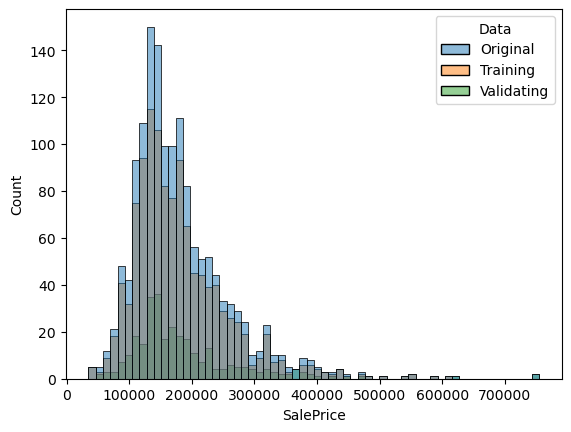

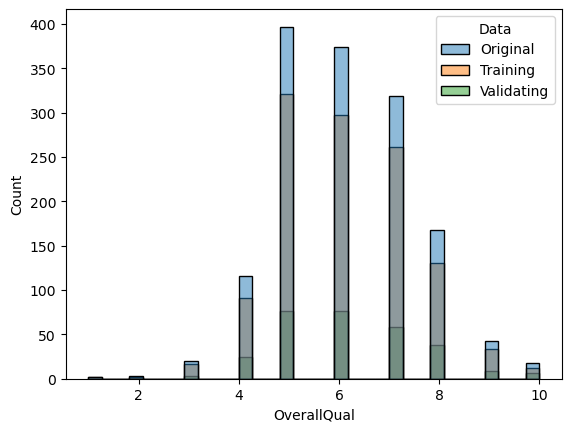

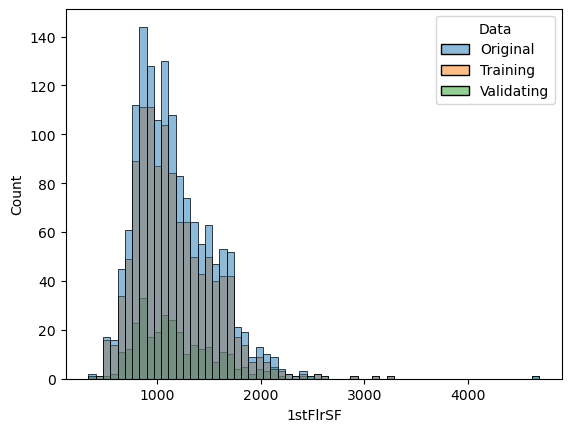

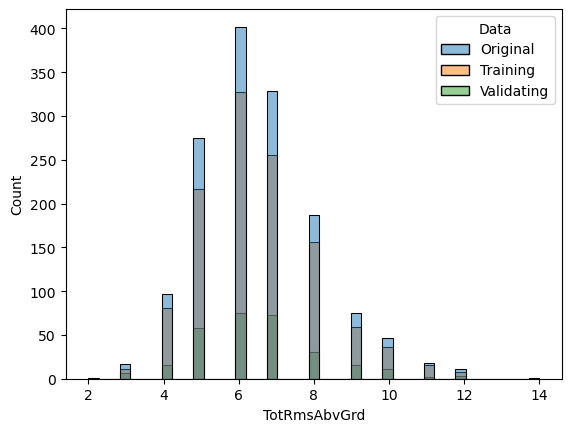

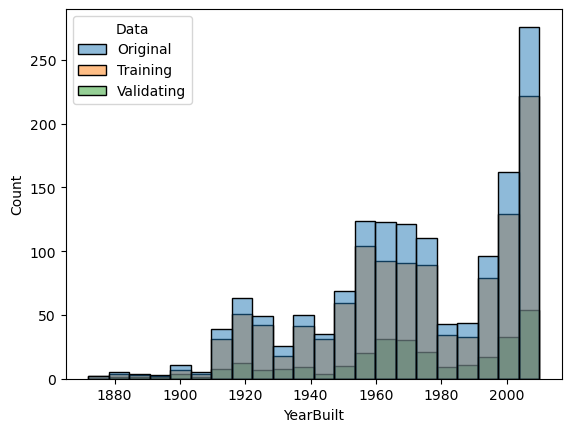

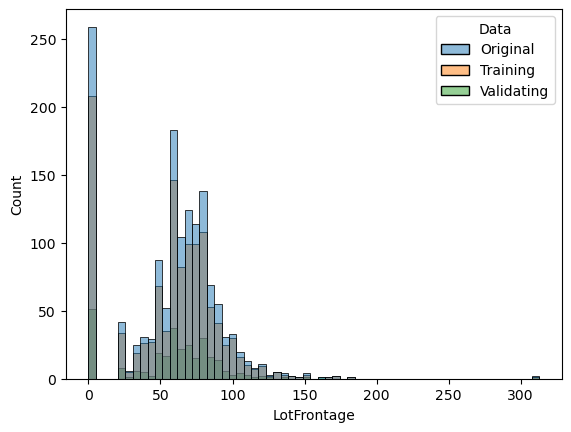

In [103]:
df['Data'] = np.full((df.shape[0]), 'Original')
df_training['Data'] = np.full((df_training.shape[0]), 'Training')
df_validating['Data'] = np.full((df_validating.shape[0]), 'Validating')
df_temp = pd.concat([df, df_training, df_validating], ignore_index = True) 

for col in df_temp.columns[:-1]:    
    sns.histplot(data=df_temp, x=col, hue='Data')
    plt.show()
    

df.drop('Data', axis = 1, inplace = True)
df_training.drop('Data', axis = 1, inplace = True)
df_validating.drop('Data', axis = 1, inplace = True)
del df_temp

# 5. Variables Independientes

## Funciones

In [145]:
def Analisis_var(df):
    corr = {}
    for col in df.columns[1:]:
        temp = np.corrcoef(x = df[col], y = df['SalePrice'])[0][1]
        corr[col] = temp
        plt.scatter(x =  df[col], y = df['SalePrice'])
        titulo = col + " | Correlacion: " + str(temp)
        plt.title(titulo)
        plt.show()
    dict(sorted(corr.items(), key=lambda item: item[1]))
    return list(corr.items())[0:2]

## Sobre Data

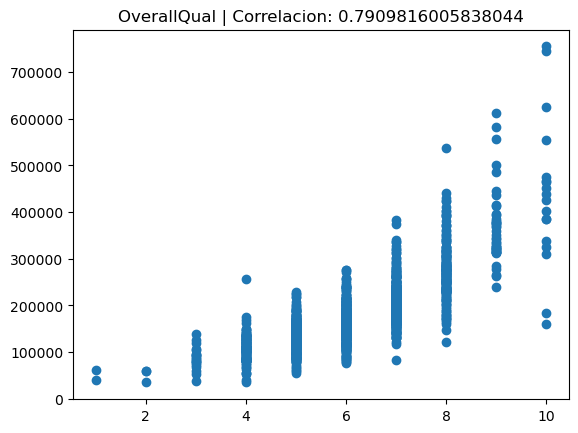

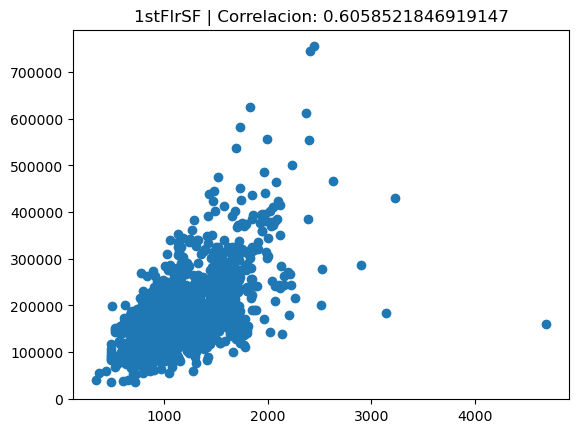

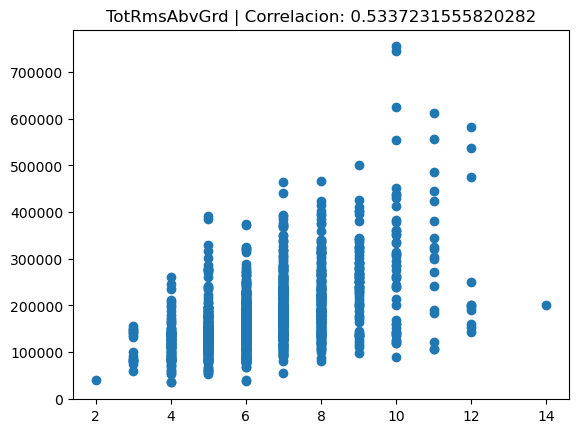

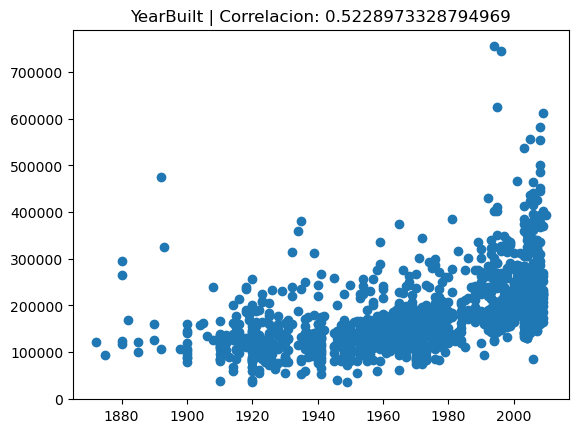

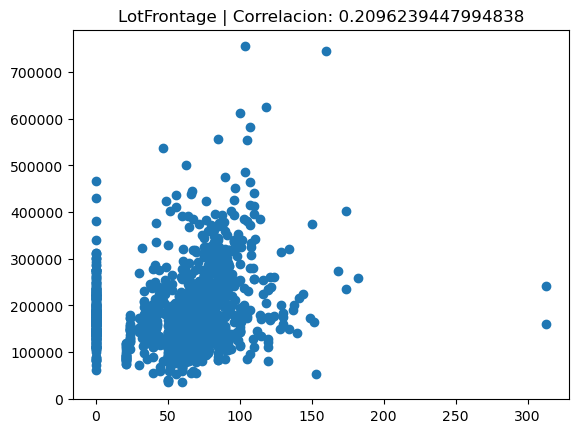

OverallQual: 0.7909816005838044
1stFlrSF: 0.6058521846919147


In [146]:
mejor_2_corr = Analisis_var(df)
for corr in mejor_2_corr:
    print(f'{corr[0]}: {corr[1]}')

## Sobre Training

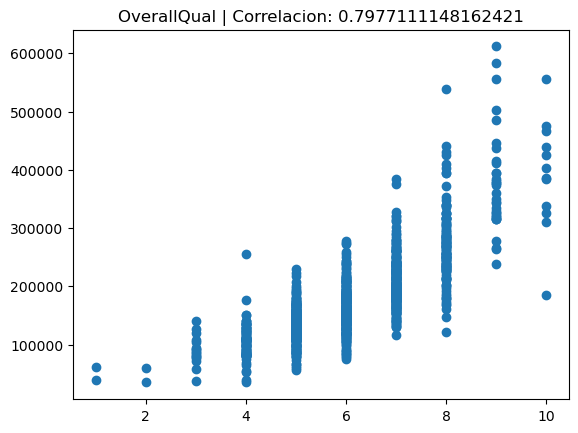

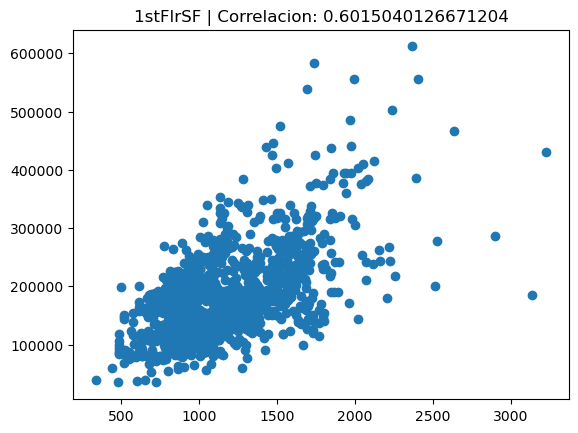

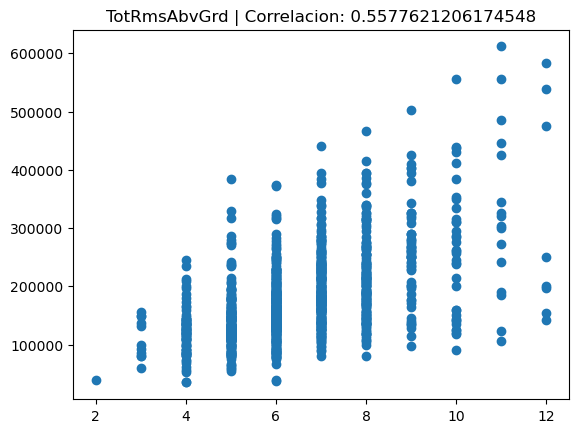

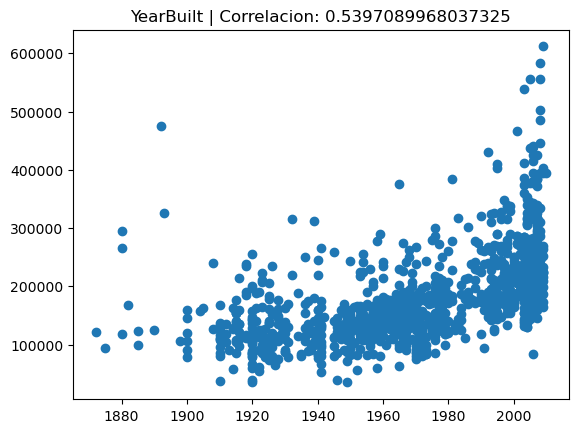

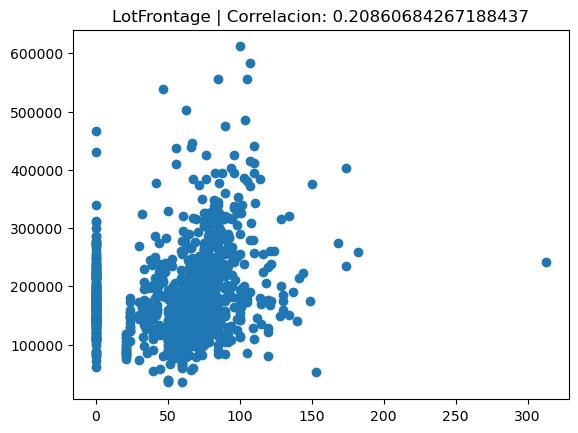

OverallQual: 0.7977111148162421
1stFlrSF: 0.6015040126671204


In [147]:
mejor_2_corr = Analisis_var(df_training)
for corr in mejor_2_corr:
    print(f'{corr[0]}: {corr[1]}')

## Sobre Validating

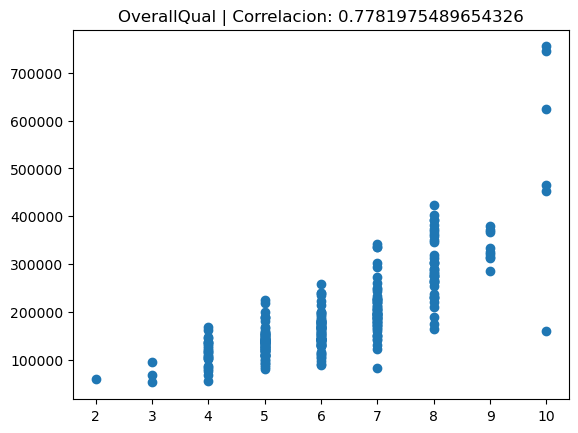

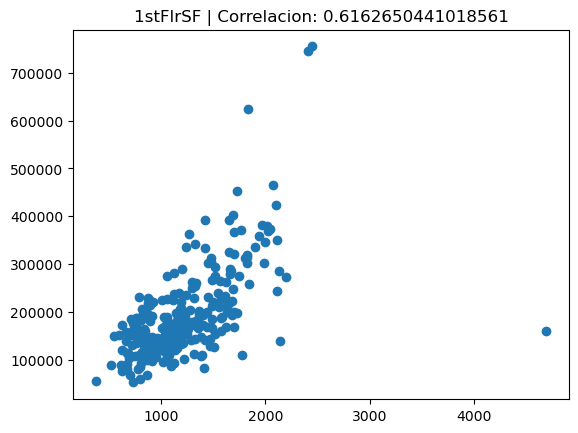

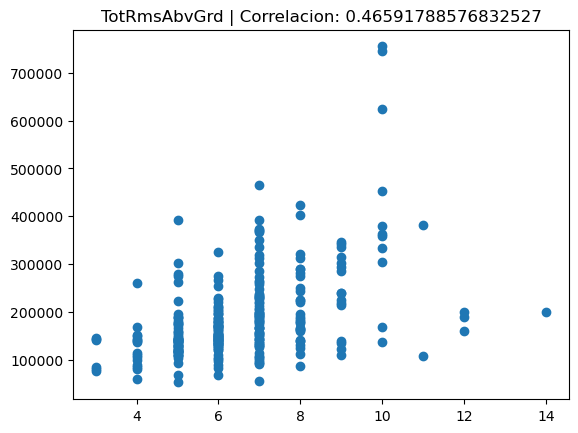

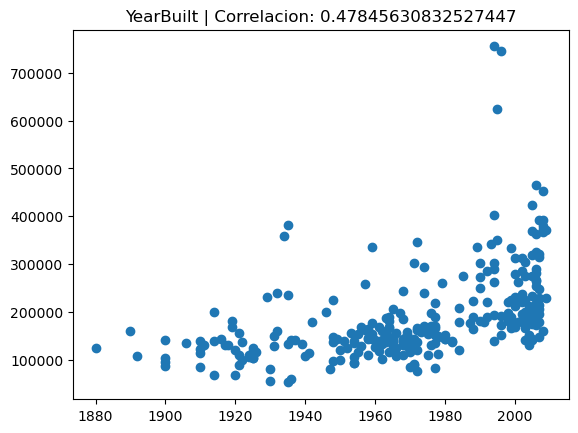

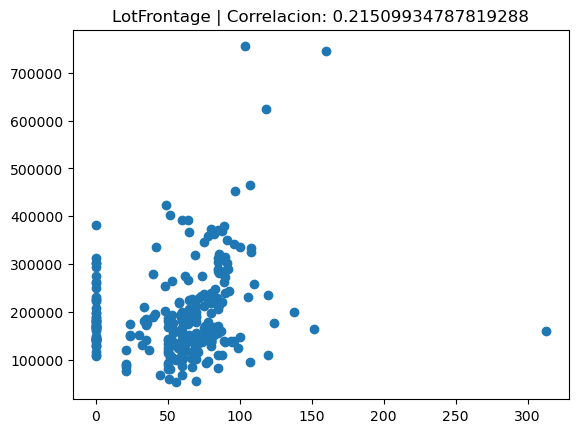

OverallQual: 0.7781975489654326
1stFlrSF: 0.6162650441018561


In [148]:
mejor_2_corr = Analisis_var(df_validating)
for corr in mejor_2_corr:
    print(f'{corr[0]}: {corr[1]}')

# 6. Regresion Lineal